In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [4]:
import_data = pd.read_csv('telescope_data.csv')

In [5]:
data = import_data.iloc[:, :-1]

In [6]:
data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620


# Q1

In [7]:
multivariate_mean_vector = np.mean(data, axis = 0)

In [8]:
multivariate_mean_vector

fLength      57.675030
fWidth       24.015214
fSize         2.873639
fConc         0.363390
fConc1        0.207434
fAsym        -3.221765
fM3Long      13.136590
fM3Trans      1.791702
fAlpha       31.526518
fDist       197.804527
dtype: float64

# Q2

In [9]:
data_centered = data - np.mean(data, axis=0)
data_centered_transpose = data_centered.T
covariance_matrix = np.dot(data_centered_transpose, data_centered)

n_observations = data_centered.shape[0]
inner_covariance_matrix = pd.DataFrame(covariance_matrix / (n_observations - 1))

In [10]:
inner_covariance_matrix

,0,1,2,3,4,5,6,7,8,9
0,1766.710603,731.278208,13.877761,-4.795976,-2.754310,-338.521963,-317.091670,134.197204,-42.699515,1088.506735
1,731.278208,511.310810,7.031488,-2.230835,-1.292486,254.802711,-419.194118,76.420843,34.672026,456.444068
2,13.877761,7.031488,0.226271,-0.067494,-0.038788,0.460739,1.608942,0.648693,-2.846388,17.400684
3,-4.795976,-2.230835,-0.067494,0.029483,0.017875,0.329190,-0.884361,-0.393915,1.319799,-4.615745
4,-2.754310,-1.292486,-0.038788,0.017875,0.011461,0.154446,-0.605827,-0.209961,0.710753,-2.523787
5,-338.521963,254.802711,0.460739,0.329190,0.154446,3899.838668,-263.597250,15.496390,10.170821,-659.973549
6,-317.091670,-419.194118,1.608942,-0.884361,-0.605827,-263.597250,2851.490243,124.168867,-277.106455,633.900249
7,134.197204,76.420843,0.648693,-0.393915,-0.209961,15.496390,124.168867,463.939383,-33.519699,165.463602
8,-42.699515,34.672026,-2.846388,1.319799,0.710753,10.170821,-277.106455,-33.519699,825.699936,-479.369739
9,1088.506735,456.444068,17.400684,-4.615745,-2.523787,-659.973549,633.900249,165.463602,-479.369739,6361.467591


# Q3

In [11]:
outer_product = np.outer(data_centered, data_centered)

n_observations = data_centered.shape[0]
outer_covariance_matrix = pd.DataFrame(outer_product / (n_observations - 1))

In [12]:
outer_covariance_matrix

,0,1,2,3,4,5,6,7,8,9,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,4.169790,1.157027,0.033028,-0.004102,1.333360e-03,-4.464902,-1.281391,1.443108,-1.236784,16.738130,...,-11.162048,-12.621532,-0.077258,0.022553,0.014256,10.451896,22.494283,10.285090,-8.196635,-12.201018
1,1.157027,0.321050,0.009165,-0.001138,3.699786e-04,-1.238914,-0.355558,0.400431,-0.343181,4.644470,...,-3.097228,-3.502203,-0.021438,0.006258,0.003956,2.900176,6.241679,2.853891,-2.274390,-3.385520
2,0.033028,0.009165,0.000262,-0.000032,1.056125e-05,-0.035365,-0.010150,0.011431,-0.009796,0.132579,...,-0.088412,-0.099972,-0.000612,0.000179,0.000113,0.082787,0.178172,0.081466,-0.064924,-0.096642
3,-0.004102,-0.001138,-0.000032,0.000004,-1.311734e-06,0.004392,0.001261,-0.001420,0.001217,-0.016467,...,0.010981,0.012417,0.000076,-0.000022,-0.000014,-0.010282,-0.022129,-0.010118,0.008064,0.012003
4,0.001333,0.000370,0.000011,-0.000001,4.263641e-07,-0.001428,-0.000410,0.000461,-0.000395,0.005352,...,-0.003569,-0.004036,-0.000025,0.000007,0.000005,0.003342,0.007193,0.003289,-0.002621,-0.003901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,10.451896,2.900176,0.082787,-0.010282,3.342168e-03,-11.191618,-3.211903,3.617261,-3.100093,41.955397,...,-27.978523,-31.636832,-0.193654,0.056530,0.035735,26.198473,56.383634,25.780362,-20.545490,-30.582782
2006,22.494283,6.241679,0.178172,-0.022129,7.192923e-03,-24.086293,-6.912570,7.784969,-6.671936,90.295253,...,-60.214609,-68.087920,-0.416777,0.121662,0.076907,56.383634,121.347308,55.483785,-44.217439,-65.819424
2007,10.285090,2.853891,0.081466,-0.010118,3.288829e-03,-11.013007,-3.160643,3.559532,-3.050618,41.285814,...,-27.532003,-31.131927,-0.190563,0.055627,0.035164,25.780362,55.483785,25.368922,-20.217596,-30.094699
2008,-8.196635,-2.274390,-0.064924,0.008064,-2.621011e-03,8.776743,2.518854,-2.836745,2.431170,-32.902459,...,21.941449,24.810385,0.151868,-0.044332,-0.028024,-20.545490,-44.217439,-20.217596,16.112281,23.983773


# Q4

In [13]:
selected_data = data.loc[:, ["fM3Long", "fM3Trans"]]
covariance_matrix = np.cov(selected_data, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [14]:
print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

Eigenvalues:
[2857.93049538  457.49913084]

Eigenvectors:
[[ 0.99865762 -0.05179726]
 [ 0.05179726  0.99865762]]


# Q5

In [15]:
selected_data = data.loc[:, ["fSize","fM3Long", "fM3Trans"]]
covariance_matrix = pd.DataFrame(np.cov(selected_data, rowvar=False))

In [16]:
covariance_matrix

,0,1,2
0,0.226271,1.608942,0.648693
1,1.608942,2851.490243,124.168867
2,0.648693,124.168867,463.939383


# Q6

In [17]:
attribute_2 = data.loc[:, "fWidth"]

q1 = np.percentile(attribute_2, 25)
median = np.percentile(attribute_2, 50)
q3 = np.percentile(attribute_2, 75)

def categorize(value):
    if value <= q1:
        return '1'
    elif q1 < value <= median:
        return '2'
    elif median < value <= q3:
        return '3'
    else:
        return '4'

categorical_attribute_2 = np.array([categorize(value) for value in attribute_2])

print("Category Counts:")
print(np.unique(categorical_attribute_2, return_counts=True))

categorical_attribute_2_encoded = np.array([np.where(np.unique(categorical_attribute_2) == category)[0][0] for category in categorical_attribute_2])

covariance_matrix_with_categorical = np.cov(categorical_attribute_2_encoded)

Category Counts:
(array(['1', '2', '3', '4'], dtype='<U1'), array([51, 50, 50, 50], dtype=int64))


In [18]:
covariance_matrix_with_categorical

array(1.26119403)

# Q7

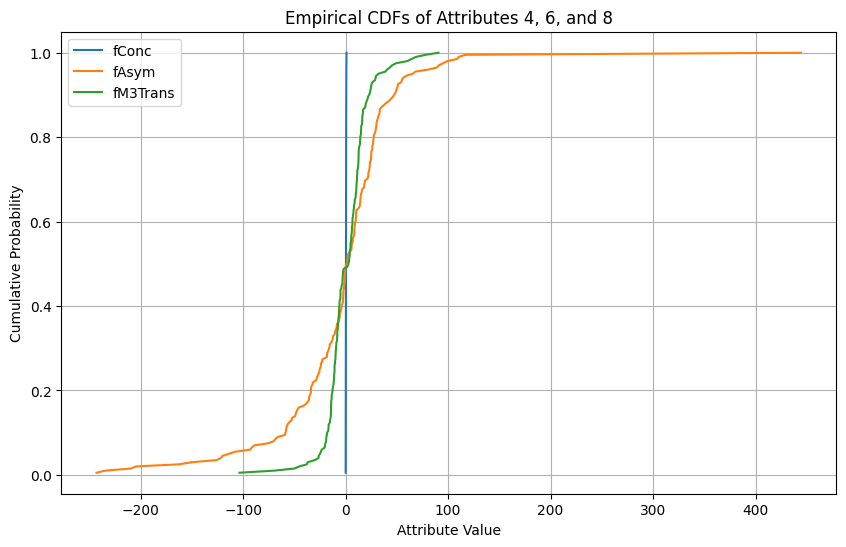

In [19]:
attributes_data = data.loc[:, ["fConc", "fAsym", "fM3Trans"]]
def empirical_cdf(data):
    sorted_data = np.sort(data)
    n = len(data)
    cdf = np.arange(1, n + 1) / n
    return sorted_data, cdf

plt.figure(figsize=(10, 6))
for i, attribute_index in enumerate(["fConc", "fAsym", "fM3Trans"]):
    attribute_data = attributes_data.loc[:, attribute_index]
    sorted_data, cdf = empirical_cdf(attribute_data)
    plt.plot(sorted_data, cdf, label=f'{attribute_index}')

plt.title('Empirical CDFs of Attributes 4, 6, and 8')
plt.xlabel('Attribute Value')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)
plt.show()

# Q8

In [20]:
selected_data = data.loc[:, ["fDist"]]
covariance_matrix = np.cov(selected_data, rowvar=False)

In [21]:
covariance_matrix

array(6361.46759083)

# Q9

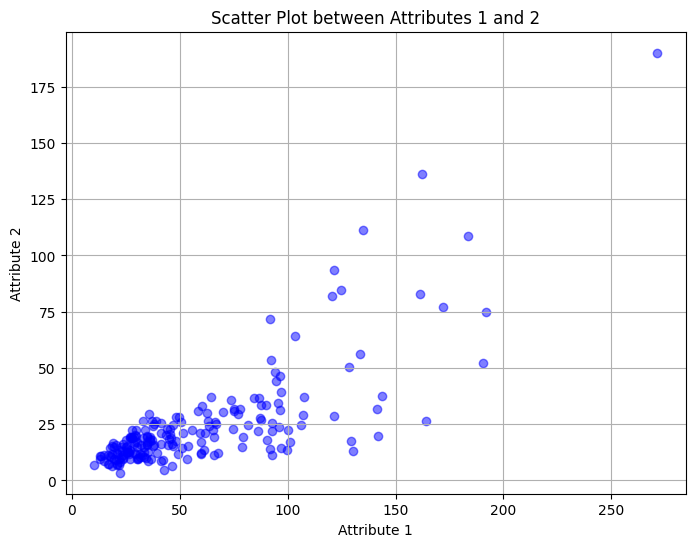

Correlation (Cosine of Angle) between Attributes 1 and 2: 0.7694093096665072


In [22]:
attribute_1 = data.loc[:, "fLength"]
attribute_2 = data.loc[:, "fWidth"]

attribute_1_centered = attribute_1 - np.mean(attribute_1)
attribute_2_centered = attribute_2 - np.mean(attribute_2)

# Compute the cosine of the angle between the centered attribute vectors
cosine_angle = np.dot(attribute_1_centered, attribute_2_centered) / (np.linalg.norm(attribute_1_centered) * np.linalg.norm(attribute_2_centered))

# Plot the scatter plot between Attributes 1 and 2
plt.figure(figsize=(8, 6))
plt.scatter(attribute_1, attribute_2, color='blue', alpha=0.5)
plt.title('Scatter Plot between Attributes 1 and 2')
plt.xlabel('Attribute 1')
plt.ylabel('Attribute 2')
plt.grid(True)
plt.show()

print("Correlation (Cosine of Angle) between Attributes 1 and 2:", cosine_angle)

# Q10

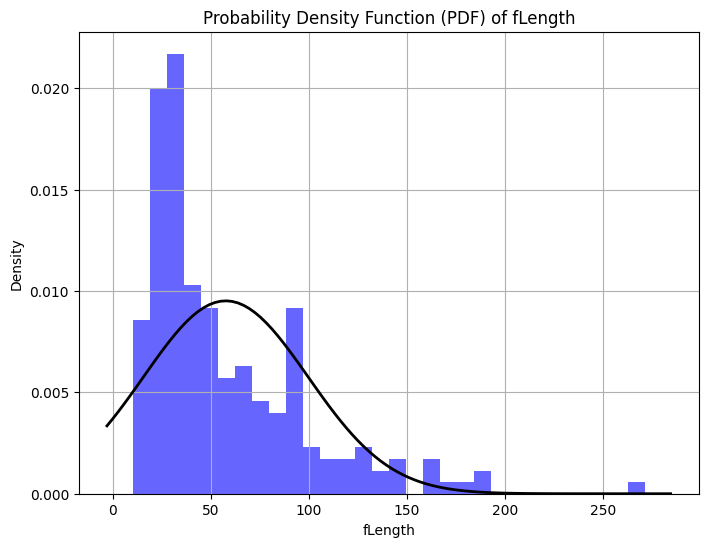

In [23]:
attribute_1 = data.loc[:, "fLength"]
mu, sigma = norm.fit(attribute_1)

plt.figure(figsize=(8, 6))
plt.hist(attribute_1, bins=30, density=True, alpha=0.6, color='blue')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)

plt.title('Probability Density Function (PDF) of fLength')
plt.xlabel('fLength')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# Q11

In [24]:
variances = np.var(data, axis=0)
max_variance_attribute_index = np.argmax(variances)
max_variance = variances[max_variance_attribute_index]
min_variance_attribute_index = np.argmin(variances)
min_variance = variances[min_variance_attribute_index]

columns = data.columns

print("Attribute with the largest variance:", columns[max_variance_attribute_index])
print("Variance:", max_variance)

print("\nAttribute with the smallest variance:", columns[min_variance_attribute_index])
print("Variance:", min_variance)

Attribute with the largest variance: fDist
Variance: 6329.818498334127

Attribute with the smallest variance: fConc1
Variance: 0.01140427339867825


# Q12

In [29]:
covariance_matrix = np.cov(data, rowvar=False)

max_covariance = float('-inf')
max_indices = None

min_covariance = float('inf')
min_indices = None

for i in range(10):
    for j in range(i + 1, 10):
        covariance = covariance_matrix[i, j]
        
        if covariance > max_covariance:
            max_covariance = covariance
            max_indices = (i, j)
        if covariance < min_covariance:
            min_covariance = covariance
            min_indices = (i, j)

print("Pair of attributes with the largest covariance (0-indexed):", max_indices)
print("Largest covariance:", max_covariance)

print("Pair of attributes with the smallest covariance (0-indexed):", min_indices)
print("Smallest covariance:", min_covariance)

Pair of attributes with the largest covariance (0-indexed): (0, 9)
Largest covariance: 1088.5067354049152
Pair of attributes with the smallest covariance (0-indexed): (5, 9)
Smallest covariance: -659.9735489916213


# Q13

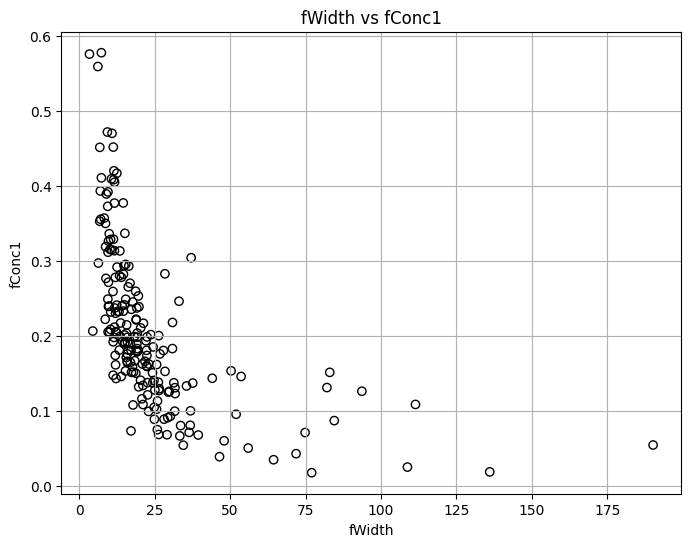

In [26]:
attribute_2 = data.loc[:, "fWidth"]
attribute_5 = data.loc[:, "fConc1"]

plt.figure(figsize=(8, 6))
plt.scatter(attribute_2, attribute_5, marker='o', edgecolors='k', facecolors='none')
plt.title('fWidth vs fConc1')
plt.xlabel('fWidth')
plt.ylabel('fConc1')
plt.grid(True)
plt.show()